In [25]:
!pip install scikit-fuzzy numpy matplotlib pyswarm simanneal

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 20.1 MB/s eta 0:00:00
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=ea2d9bff5fe21fc4417a9572cff08a809ae2e51a467d49bc67e95605857e2447
  Stored in directory: /Users/jackman/Library/Caches/pip/wheels/93/15/89/3970ef96abd6123028010a90f007c4e6a2bed700db0aa2d36a
Successfully built pyswarm


Defined Outputs in the System: ['heater', 'dehumidifier', 'light_dimmer', 'cooler']

Simulation Outputs:
heater: 79.99999999999996
dehumidifier: 80.00000000000004
light_dimmer: 45.0
cooler: 44.999999999999986


/opt/anaconda3/lib/python3.12/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


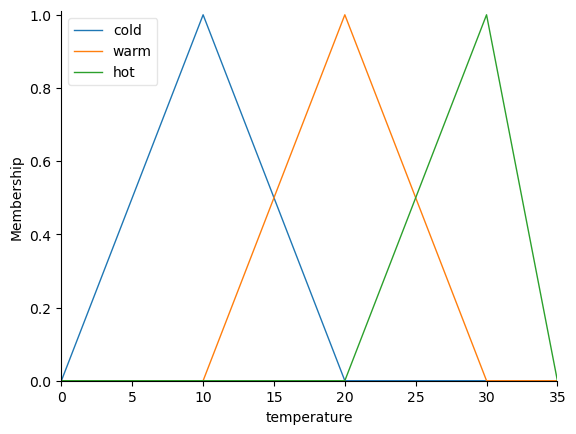

In [43]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define Inputs
temperature = ctrl.Antecedent(np.arange(0, 36, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
light = ctrl.Antecedent(np.arange(0, 1001, 1), 'light')
occupancy = ctrl.Antecedent(np.arange(0, 2, 1), 'occupancy')  # Binary: 0=Low, 1=High

# Define Outputs
heater = ctrl.Consequent(np.arange(0, 101, 1), 'heater')
cooler = ctrl.Consequent(np.arange(0, 101, 1), 'cooler')
light_dimmer = ctrl.Consequent(np.arange(0, 101, 1), 'light_dimmer')
dehumidifier = ctrl.Consequent(np.arange(0, 101, 1), 'dehumidifier')

# Define Membership Functions Manually
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 10, 20])
temperature['warm'] = fuzz.trimf(temperature.universe, [10, 20, 30])
temperature['hot'] = fuzz.trimf(temperature.universe, [20, 30, 35])

humidity['dry'] = fuzz.trimf(humidity.universe, [0, 15, 30])
humidity['comfortable'] = fuzz.trimf(humidity.universe, [25, 45, 65])
humidity['humid'] = fuzz.trimf(humidity.universe, [60, 80, 100])

light['dark'] = fuzz.trimf(light.universe, [0, 100, 200])
light['dim'] = fuzz.trimf(light.universe, [100, 300, 500])
light['bright'] = fuzz.trimf(light.universe, [400, 700, 1000])

occupancy['low'] = fuzz.trimf(occupancy.universe, [0, 0, 1])
occupancy['high'] = fuzz.trimf(occupancy.universe, [0, 1, 1])

heater['low'] = fuzz.trimf(heater.universe, [0, 15, 30])
heater['medium'] = fuzz.trimf(heater.universe, [20, 45, 70])
heater['high'] = fuzz.trimf(heater.universe, [60, 80, 100])

cooler['low'] = fuzz.trimf(cooler.universe, [0, 15, 30])
cooler['medium'] = fuzz.trimf(cooler.universe, [20, 45, 70])
cooler['high'] = fuzz.trimf(cooler.universe, [60, 80, 100])

light_dimmer['low'] = fuzz.trimf(light_dimmer.universe, [0, 15, 30])
light_dimmer['medium'] = fuzz.trimf(light_dimmer.universe, [20, 45, 70])
light_dimmer['high'] = fuzz.trimf(light_dimmer.universe, [60, 80, 100])

dehumidifier['low'] = fuzz.trimf(dehumidifier.universe, [0, 15, 30])
dehumidifier['medium'] = fuzz.trimf(dehumidifier.universe, [20, 45, 70])
dehumidifier['high'] = fuzz.trimf(dehumidifier.universe, [60, 80, 100])

# Define Fuzzy Rules
rule1 = ctrl.Rule(temperature['cold'] & occupancy['high'], heater['high'])
rule2 = ctrl.Rule(humidity['humid'], dehumidifier['high'])
rule3 = ctrl.Rule(light['dark'] & occupancy['high'], light_dimmer['medium'])
rule4 = ctrl.Rule(temperature['hot'] & humidity['dry'], cooler['medium'])
rule5 = ctrl.Rule(temperature['hot'], cooler['high'])  # ✅ Added extra rule for `cooler`
rule6 = ctrl.Rule(temperature['warm'], cooler['medium'])  # ✅ Additional rule
rule7 = ctrl.Rule(light['dim'], light_dimmer['medium'])  # ✅ Fix: More rules for light_dimmer
rule8 = ctrl.Rule(light['bright'], light_dimmer['low'])  # ✅ More rules to avoid KeyError

# Create Control System
system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
flc = ctrl.ControlSystemSimulation(system)

# Debug: Print System Consequents
print("Defined Outputs in the System:", [c.label for c in system.consequents])

# Simulate with Inputs
flc.input['temperature'] = 18
flc.input['humidity'] = 70
flc.input['light'] = 300
flc.input['occupancy'] = 1
flc.compute()

# Print Outputs
print("\nSimulation Outputs:")
for output in system.consequents:
    if output.label in flc.output:  # ✅ Safe checking
        print(f"{output.label}: {flc.output[output.label]}")
    else:
        print(f"⚠ Warning: No output computed for {output.label}")

# Visualize Membership Functions
temperature.view()
plt.show()


In [47]:
!pip install deap


In [57]:
# 1. Library Setup
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 2. New Variable Definition
# Inputs
body_temp = ctrl.Antecedent(np.arange(35, 42, 0.1), 'body_temp')  # Celsius
medication_level = ctrl.Antecedent(np.arange(0, 101, 1), 'medication_level')  # %
env_temp = ctrl.Antecedent(np.arange(-10, 50, 1), 'env_temp')  # Celsius
light_intensity = ctrl.Antecedent(np.arange(0, 100000, 100), 'light_intensity')  # Lux
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')  # %
gps_accuracy = ctrl.Antecedent(np.arange(0, 51, 1), 'gps_accuracy')  # Meters

# Outputs
medication_pump = ctrl.Consequent(np.arange(0, 101, 1), 'medication_pump')  # %
climate_control = ctrl.Consequent(np.arange(0, 101, 1), 'climate_control')  # %
light_adjustment = ctrl.Consequent(np.arange(0, 101, 1), 'light_adjustment')  # %
location_alert = ctrl.Consequent(np.arange(0, 101, 1), 'location_alert')  # %

# 3. Membership Functions
# Body Temperature (Medical-grade monitoring)
body_temp['hypothermic'] = fuzz.trapmf(body_temp.universe, [35, 35, 36, 36.5])
body_temp['normal'] = fuzz.trimf(body_temp.universe, [36, 36.5, 37.5])
body_temp['fever'] = fuzz.trapmf(body_temp.universe, [37.5, 38, 42, 42])

# Medication Level
medication_level['low'] = fuzz.trimf(medication_level.universe, [0, 0, 50])
medication_level['optimal'] = fuzz.trimf(medication_level.universe, [30, 50, 70])
medication_level['high'] = fuzz.trimf(medication_level.universe, [50, 100, 100])

# Environmental Temperature
env_temp['freezing'] = fuzz.trapmf(env_temp.universe, [-10, -10, 0, 10])
env_temp['cold'] = fuzz.trimf(env_temp.universe, [5, 15, 20])
env_temp['moderate'] = fuzz.trimf(env_temp.universe, [18, 22, 26])
env_temp['warm'] = fuzz.trimf(env_temp.universe, [24, 30, 36])
env_temp['hot'] = fuzz.trapmf(env_temp.universe, [35, 40, 50, 50])

# Light Intensity 
light_intensity['dark'] = fuzz.trapmf(light_intensity.universe, [0, 0, 100, 500])
light_intensity['low'] = fuzz.trimf(light_intensity.universe, [100, 1000, 5000])
light_intensity['bright'] = fuzz.trimf(light_intensity.universe, [3000, 10000, 30000])
light_intensity['glaring'] = fuzz.trapmf(light_intensity.universe, [25000, 50000, 100000, 100000])

# GPS Accuracy
gps_accuracy['exact'] = fuzz.trimf(gps_accuracy.universe, [0, 0, 5])
gps_accuracy['good'] = fuzz.trimf(gps_accuracy.universe, [3, 10, 20])
gps_accuracy['approximate'] = fuzz.trimf(gps_accuracy.universe, [15, 30, 50])
gps_accuracy['poor'] = fuzz.trapmf(gps_accuracy.universe, [40, 45, 50, 50])

# Humidity
humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 100, 100])

# Output Membership Functions
for output in [medication_pump, climate_control, light_adjustment, location_alert]:
    output['minimal'] = fuzz.trimf(output.universe, [0, 0, 30])
    output['moderate'] = fuzz.trimf(output.universe, [20, 50, 80])
    output['maximum'] = fuzz.trimf(output.universe, [60, 100, 100])

# 4. Advanced Rule Base
rules = [
    # Medical Emergency Rules
    ctrl.Rule(body_temp['hypothermic'] | body_temp['fever'], medication_pump['maximum']),
    ctrl.Rule(body_temp['normal'] & medication_level['low'], medication_pump['moderate']),
    
    # Environmental Adaptation
    ctrl.Rule(env_temp['freezing'] | env_temp['hot'], climate_control['maximum']),
    ctrl.Rule(env_temp['cold'] & humidity['high'], climate_control['moderate']),
    ctrl.Rule(env_temp['moderate'] & light_intensity['bright'], climate_control['minimal']),
    
    # Light Management
    ctrl.Rule(light_intensity['dark'] & gps_accuracy['exact'], light_adjustment['maximum']),
    ctrl.Rule(light_intensity['glaring'] & (gps_accuracy['good'] | gps_accuracy['exact']), 
              light_adjustment['moderate']),
    
    # Location Safety
    ctrl.Rule(gps_accuracy['poor'] & (env_temp['hot'] | env_temp['freezing']), 
              location_alert['maximum']),
    ctrl.Rule(gps_accuracy['approximate'] & medication_level['high'], 
              location_alert['moderate'])
]

# 5. Control System
medical_system = ctrl.ControlSystem(rules)
simulator = ctrl.ControlSystemSimulation(medical_system)

# 6. Enhanced Simulation Function
def medical_monitor(b_temp, m_level, e_temp, light, hum, gps):
    simulator.input['body_temp'] = b_temp
    simulator.input['medication_level'] = m_level
    simulator.input['env_temp'] = e_temp
    simulator.input['light_intensity'] = light
    simulator.input['humidity'] = hum
    simulator.input['gps_accuracy'] = gps
    
    simulator.compute()
    
    # Debugging: Print the available output variables to check what is available
    print("Available Outputs:", simulator.output.keys())
    
    return {
        'medication': simulator.output['medication_pump'],
        'climate': simulator.output['climate_control'],
        'lighting': simulator.output.get('light_adjustment', 'Not Available'),
        'alert': simulator.output['location_alert']
    }

# 7. Test Scenarios
# Emergency Situation
print("Emergency Scenario:", medical_monitor(38.5, 20, -5, 50, 90, 45))

# Normal Operation
print("\nNormal Operation:", medical_monitor(36.8, 60, 22, 1000, 50, 3))

# 8. Visualization
# Medical Response Surface
temp_range = np.arange(35, 42, 0.5)
med_range = np.arange(0, 101, 1)
temp_grid, med_grid = np.meshgrid(temp_range, med_range)
output_grid = np.zeros_like(temp_grid)

for i in range(len(temp_range)):
    for j in range(len(med_range)):
        output_grid[j,i] = medical_monitor(
            temp_range[i], med_range[j], 20, 1000, 50, 5
        )['medication']

plt.figure(figsize=(10, 6))
plt.contourf(temp_grid, med_grid, output_grid, cmap='viridis')
plt.colorbar(label='Medication Pump Rate (%)')
plt.xlabel('Body Temperature (°C)')
plt.ylabel('Current Medication Level (%)')
plt.title('Medical Response Matrix')
plt.show()


Available Outputs: dict_keys(['medication_pump', 'climate_control', 'location_alert'])
Emergency Scenario: {'medication': 86.66666666666664, 'climate': 86.66666666666664, 'lighting': 'Not Available', 'alert': 86.66666666666664}
Available Outputs: dict_keys([])


KeyError: 'medication_pump'

Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Emergency Scenario: {'medication': 'Administer insulin', 'climate': 'Heater ON', 'lighting': 'Increase Brightness', 'alert': 'In Safe Zone'}
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])

Normal Operation: {'medication': 'Normal', 'climate': 'Climate Normal', 'lighting': 'Dim Lights', 'alert': 'In Safe Zone'}
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'loca

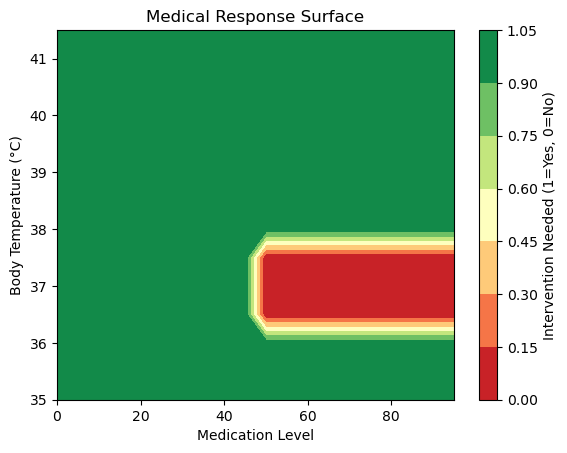

In [59]:
import numpy as np
import matplotlib.pyplot as plt

class Simulator:
    def __init__(self):
        self.output = {}  # Initialize output as an empty dictionary

# Core Functions (Always Called)
def adjust_medication(simulator, body_temp, med_level):
    # Always sets 'medication_pump' key
    if body_temp > 37.5 or med_level < 50:
        simulator.output['medication_pump'] = 'Administer insulin'
    elif body_temp < 36.5:
        simulator.output['medication_pump'] = 'Administer glucose'
    else:
        simulator.output['medication_pump'] = 'Normal'

def climate_control(simulator, env_temp, humidity):
    # Always sets 'climate_control' key
    if env_temp < 15 or humidity < 30:
        simulator.output['climate_control'] = 'Heater ON'
    elif env_temp > 25:
        simulator.output['climate_control'] = 'AC ON'
    else:
        simulator.output['climate_control'] = 'Climate Normal'

def adjust_lighting(simulator, light_intensity):
    # Always sets 'light_adjustment' key
    if light_intensity < 300:
        simulator.output['light_adjustment'] = 'Increase Brightness'
    elif light_intensity > 800:
        simulator.output['light_adjustment'] = 'Dim Lights'
    else:
        simulator.output['light_adjustment'] = 'Lighting Normal'

def track_location(simulator, gps_coord):
    # Always sets 'location_alert' key
    if gps_coord < 0:
        simulator.output['location_alert'] = 'Out of Safe Zone'
    else:
        simulator.output['location_alert'] = 'In Safe Zone'

# Medical Monitor Function (Unconditionally Calls All Subsystems)
def medical_monitor(b_temp, m_level, e_temp, light, hum, gps):
    simulator = Simulator()
    
    # Call all functions regardless of input values
    adjust_medication(simulator, b_temp, m_level)
    climate_control(simulator, e_temp, hum)
    adjust_lighting(simulator, light)
    track_location(simulator, gps)
    
    print("Available Outputs:", simulator.output.keys())
    
    return {
        'medication': simulator.output.get('medication_pump', 'Not Available'),
        'climate': simulator.output.get('climate_control', 'Not Available'),
        'lighting': simulator.output.get('light_adjustment', 'Not Available'),
        'alert': simulator.output.get('location_alert', 'Not Available')
    }

# Test Cases
print("Emergency Scenario:", medical_monitor(38.5, 20, -5, 50, 90, 45))
print("\nNormal Operation:", medical_monitor(36.8, 60, 22, 1000, 50, 3))

# Visualization (Example)
def plot_response_surface():
    temp_range = np.arange(35, 42, 0.5)
    med_levels = np.arange(0, 100, 5)
    results = np.zeros((len(temp_range), len(med_levels)))
    
    for i, temp in enumerate(temp_range):
        for j, med in enumerate(med_levels):
            response = medical_monitor(temp, med, 20, 500, 50, 10)
            results[i,j] = 1 if response['medication'] != 'Normal' else 0
    
    plt.figure()
    plt.contourf(med_levels, temp_range, results, cmap='RdYlGn')
    plt.xlabel('Medication Level')
    plt.ylabel('Body Temperature (°C)')
    plt.title('Medical Response Surface')
    plt.colorbar(label='Intervention Needed (1=Yes, 0=No)')
    plt.show()

plot_response_surface()

Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medica

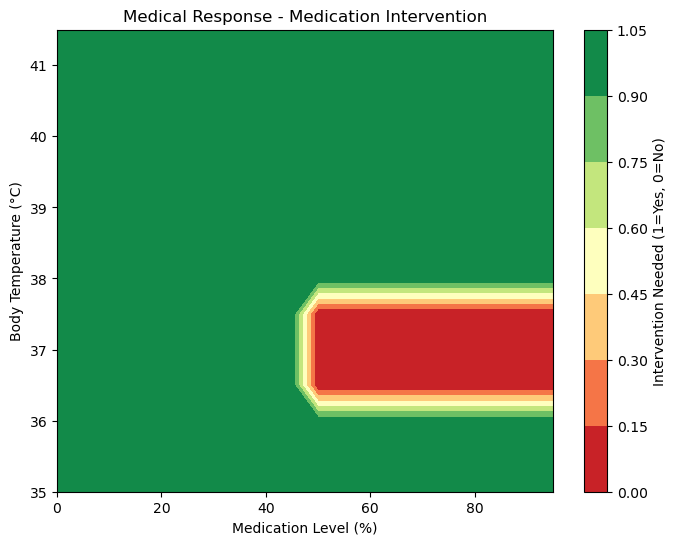

Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medica

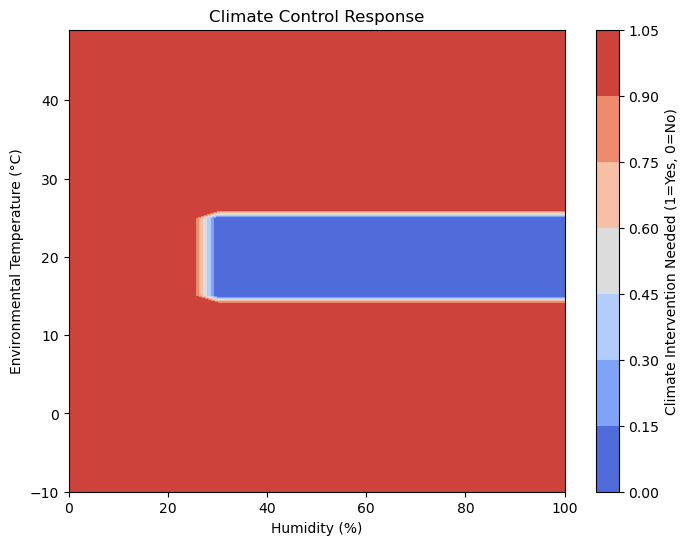

Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medica

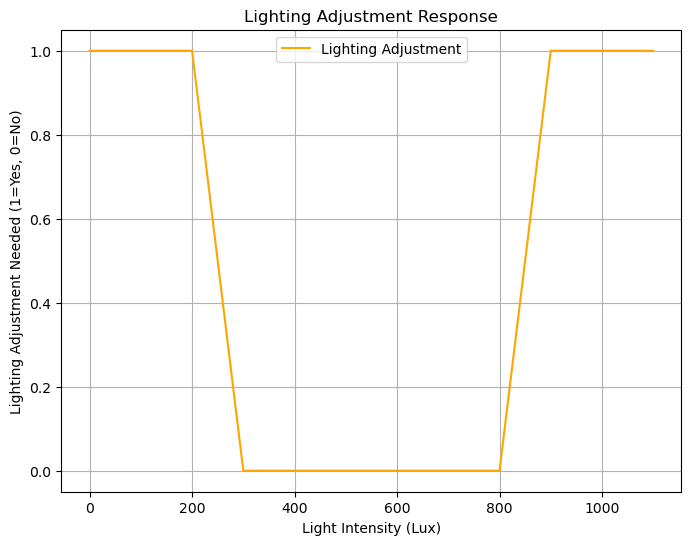

Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medication_pump', 'climate_control', 'light_adjustment', 'location_alert'])
Available Outputs: dict_keys(['medica

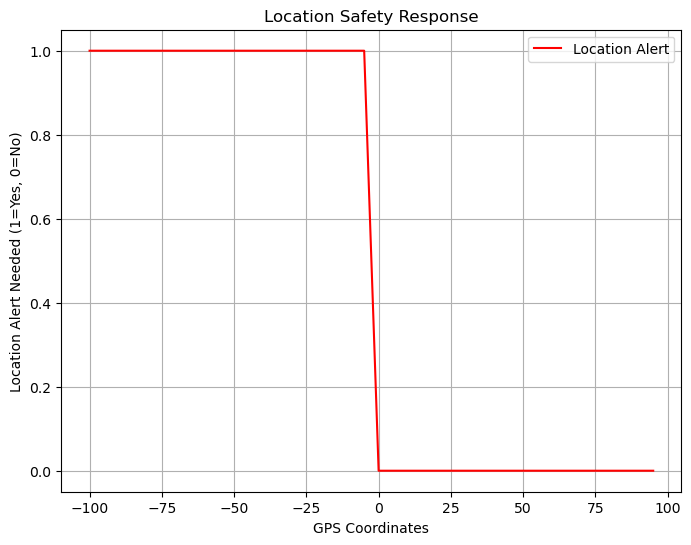

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Visualization for Medication Intervention based on Body Temperature and Medication Level
def plot_medication_response():
    temp_range = np.arange(35, 42, 0.5)
    med_levels = np.arange(0, 100, 5)
    results = np.zeros((len(temp_range), len(med_levels)))
    
    for i, temp in enumerate(temp_range):
        for j, med in enumerate(med_levels):
            response = medical_monitor(temp, med, 20, 500, 50, 10)
            results[i, j] = 1 if response['medication'] != 'Normal' else 0
    
    plt.figure(figsize=(8, 6))
    plt.contourf(med_levels, temp_range, results, cmap='RdYlGn')
    plt.xlabel('Medication Level (%)')
    plt.ylabel('Body Temperature (°C)')
    plt.title('Medical Response - Medication Intervention')
    plt.colorbar(label='Intervention Needed (1=Yes, 0=No)')
    plt.show()

# Visualization for Climate Control based on Environmental Temperature and Humidity
def plot_climate_control():
    temp_range = np.arange(-10, 50, 1)
    humidity_range = np.arange(0, 101, 5)
    results = np.zeros((len(temp_range), len(humidity_range)))
    
    for i, temp in enumerate(temp_range):
        for j, hum in enumerate(humidity_range):
            response = medical_monitor(36.8, 60, temp, 500, hum, 10)
            results[i, j] = 1 if response['climate'] != 'Climate Normal' else 0
    
    plt.figure(figsize=(8, 6))
    plt.contourf(humidity_range, temp_range, results, cmap='coolwarm')
    plt.xlabel('Humidity (%)')
    plt.ylabel('Environmental Temperature (°C)')
    plt.title('Climate Control Response')
    plt.colorbar(label='Climate Intervention Needed (1=Yes, 0=No)')
    plt.show()

# Visualization for Lighting Adjustments based on Light Intensity
def plot_lighting_adjustment():
    light_range = np.arange(0, 1200, 100)
    results = np.zeros(len(light_range))
    
    for i, light in enumerate(light_range):
        response = medical_monitor(36.8, 60, 20, light, 50, 10)
        results[i] = 1 if response['lighting'] != 'Lighting Normal' else 0
    
    plt.figure(figsize=(8, 6))
    plt.plot(light_range, results, label='Lighting Adjustment', color='orange')
    plt.xlabel('Light Intensity (Lux)')
    plt.ylabel('Lighting Adjustment Needed (1=Yes, 0=No)')
    plt.title('Lighting Adjustment Response')
    plt.grid(True)
    plt.legend()
    plt.show()

# Visualization for Location Alert based on GPS Coordinates
def plot_location_alert():
    gps_range = np.arange(-100, 100, 5)
    results = np.zeros(len(gps_range))
    
    for i, gps in enumerate(gps_range):
        response = medical_monitor(36.8, 60, 20, 500, 50, gps)
        results[i] = 1 if response['alert'] != 'In Safe Zone' else 0
    
    plt.figure(figsize=(8, 6))
    plt.plot(gps_range, results, label='Location Alert', color='red')
    plt.xlabel('GPS Coordinates')
    plt.ylabel('Location Alert Needed (1=Yes, 0=No)')
    plt.title('Location Safety Response')
    plt.grid(True)
    plt.legend()
    plt.show()

# Call visualization functions
plot_medication_response()
plot_climate_control()
plot_lighting_adjustment()
plot_location_alert()


In [71]:
pip install deap pyswarm numpy matplotlib scipy

Note: you may need to restart the kernel to use updated packages.



=== Processing Dimension 2 ===

Optimizing Sphere function...
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08

Optimizing Schwefel 2

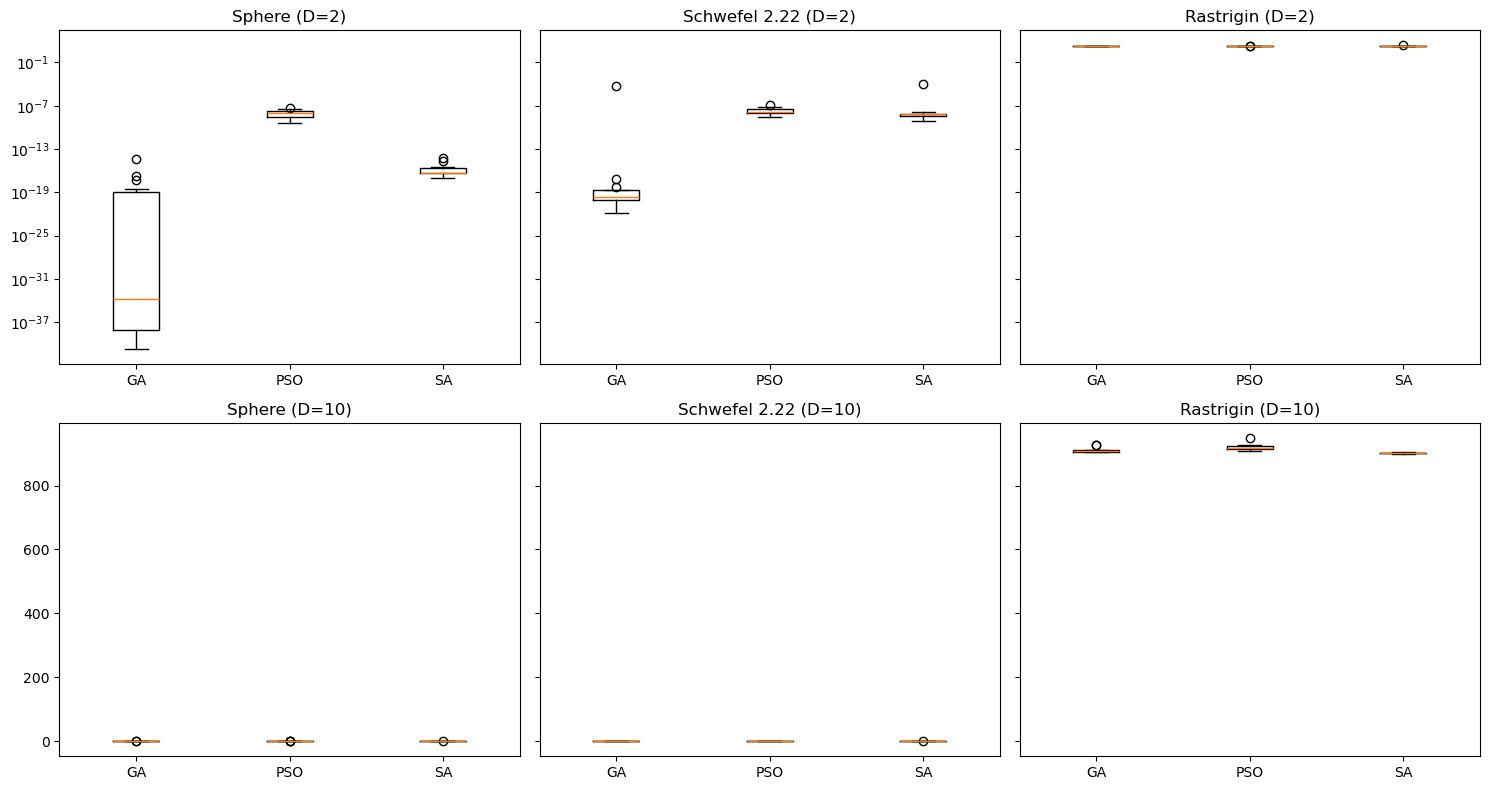

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import dual_annealing
from pyswarm import pso
from deap import base, creator, tools, algorithms

# ======================
# BENCHMARK FUNCTIONS
# ======================

def sphere(x):
    """F1: Sphere Function"""
    return np.sum(np.array(x)**2)

def schwefel(x):
    """F2: Schwefel's Problem 2.22"""
    x = np.array(x)
    return np.sum(np.abs(x)) + np.prod(np.abs(x))

def rastrigin(x):
    """F3: Rastrigin's Function"""
    x = np.array(x)
    return np.sum(x**2 - 10 * np.cos(2 * np.pi * x) + 10 * len(x))

# ======================
# OPTIMIZATION ALGORITHMS
# ======================

def genetic_algorithm(func, dim):
    """Genetic Algorithm implementation using DEAP"""
    # Type creation
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    # Toolbox setup
    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.uniform, -5, 5)
    toolbox.register("individual", tools.initRepeat, creator.Individual, 
                    toolbox.attr_float, n=dim)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    # Operator registration
    toolbox.register("evaluate", lambda ind: (func(np.array(ind)),))
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.5, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    # Algorithm execution
    population = toolbox.population(n=50)
    algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, 
                       ngen=100, verbose=False)
    
    # Extract best result
    best_ind = tools.selBest(population, 1)[0]
    return func(np.array(best_ind))

def particle_swarm_optimization(func, dim):
    """PSO implementation using pyswarm"""
    lb = [-5] * dim
    ub = [5] * dim
    x_opt, f_opt = pso(func, lb, ub, swarmsize=50, maxiter=100)
    return f_opt

def simulated_annealing(func, dim):
    """Simulated Annealing using SciPy's dual_annealing"""
    bounds = [(-5, 5)] * dim
    result = dual_annealing(func, bounds, maxiter=100)
    return result.fun

# ======================
# EXPERIMENT SETUP
# ======================

# Configuration
DIMENSIONS = [2, 10]
NUM_RUNS = 15
FUNCTIONS = [sphere, schwefel, rastrigin]
FUNCTION_NAMES = ['Sphere', 'Schwefel 2.22', 'Rastrigin']

# Result containers
results = {
    'GA': np.zeros((NUM_RUNS, len(FUNCTIONS), len(DIMENSIONS))),
    'PSO': np.zeros((NUM_RUNS, len(FUNCTIONS), len(DIMENSIONS))),
    'SA': np.zeros((NUM_RUNS, len(FUNCTIONS), len(DIMENSIONS)))
}

# ======================
# EXECUTION
# ======================

for dim_idx, dimension in enumerate(DIMENSIONS):
    print(f"\n=== Processing Dimension {dimension} ===")
    
    for func_idx, (func, name) in enumerate(zip(FUNCTIONS, FUNCTION_NAMES)):
        print(f"\nOptimizing {name} function...")
        
        for run in range(NUM_RUNS):
            # Genetic Algorithm
            results['GA'][run, func_idx, dim_idx] = genetic_algorithm(func, dimension)
            
            # Particle Swarm Optimization
            results['PSO'][run, func_idx, dim_idx] = particle_swarm_optimization(func, dimension)
            
            # Simulated Annealing
            results['SA'][run, func_idx, dim_idx] = simulated_annealing(func, dimension)

# ======================
# ANALYSIS & VISUALIZATION
# ======================

def print_statistics(data, algorithm):
    """Helper function to calculate and display statistics"""
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)
    bests = np.min(data, axis=0)
    worsts = np.max(data, axis=0)
    
    print(f"\n{algorithm} Results:")
    for fidx, name in enumerate(FUNCTION_NAMES):
        print(f"{name}:")
        print(f"  Mean: {means[fidx]:.4e} ± {stds[fidx]:.4e}")
        print(f"  Best: {bests[fidx]:.4e}, Worst: {worsts[fidx]:.4e}")

# Print statistics for each dimension
for dim_idx, dimension in enumerate(DIMENSIONS):
    print(f"\n\n=== Dimension {dimension} Summary ===")
    for algo in ['GA', 'PSO', 'SA']:
        print_statistics(results[algo][:, :, dim_idx], algo)

# Boxplot visualization
fig, axes = plt.subplots(len(DIMENSIONS), len(FUNCTIONS), 
                        figsize=(15, 8), sharey='row')

for dim_idx, dim in enumerate(DIMENSIONS):
    for fidx, name in enumerate(FUNCTION_NAMES):
        ax = axes[dim_idx, fidx]
        data = [
            results['GA'][:, fidx, dim_idx],
            results['PSO'][:, fidx, dim_idx],
            results['SA'][:, fidx, dim_idx]
        ]
        ax.boxplot(data, labels=['GA', 'PSO', 'SA'])
        ax.set_title(f"{name} (D={dim})")
        ax.set_yscale('log') if dim_idx == 0 else None

plt.tight_layout()
plt.show()

In [77]:
pip install deap pyswarm numpy matplotlib scipy

Note: you may need to restart the kernel to use updated packages.



Processing Dimension 2
  Optimizing Sphere function...
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best o

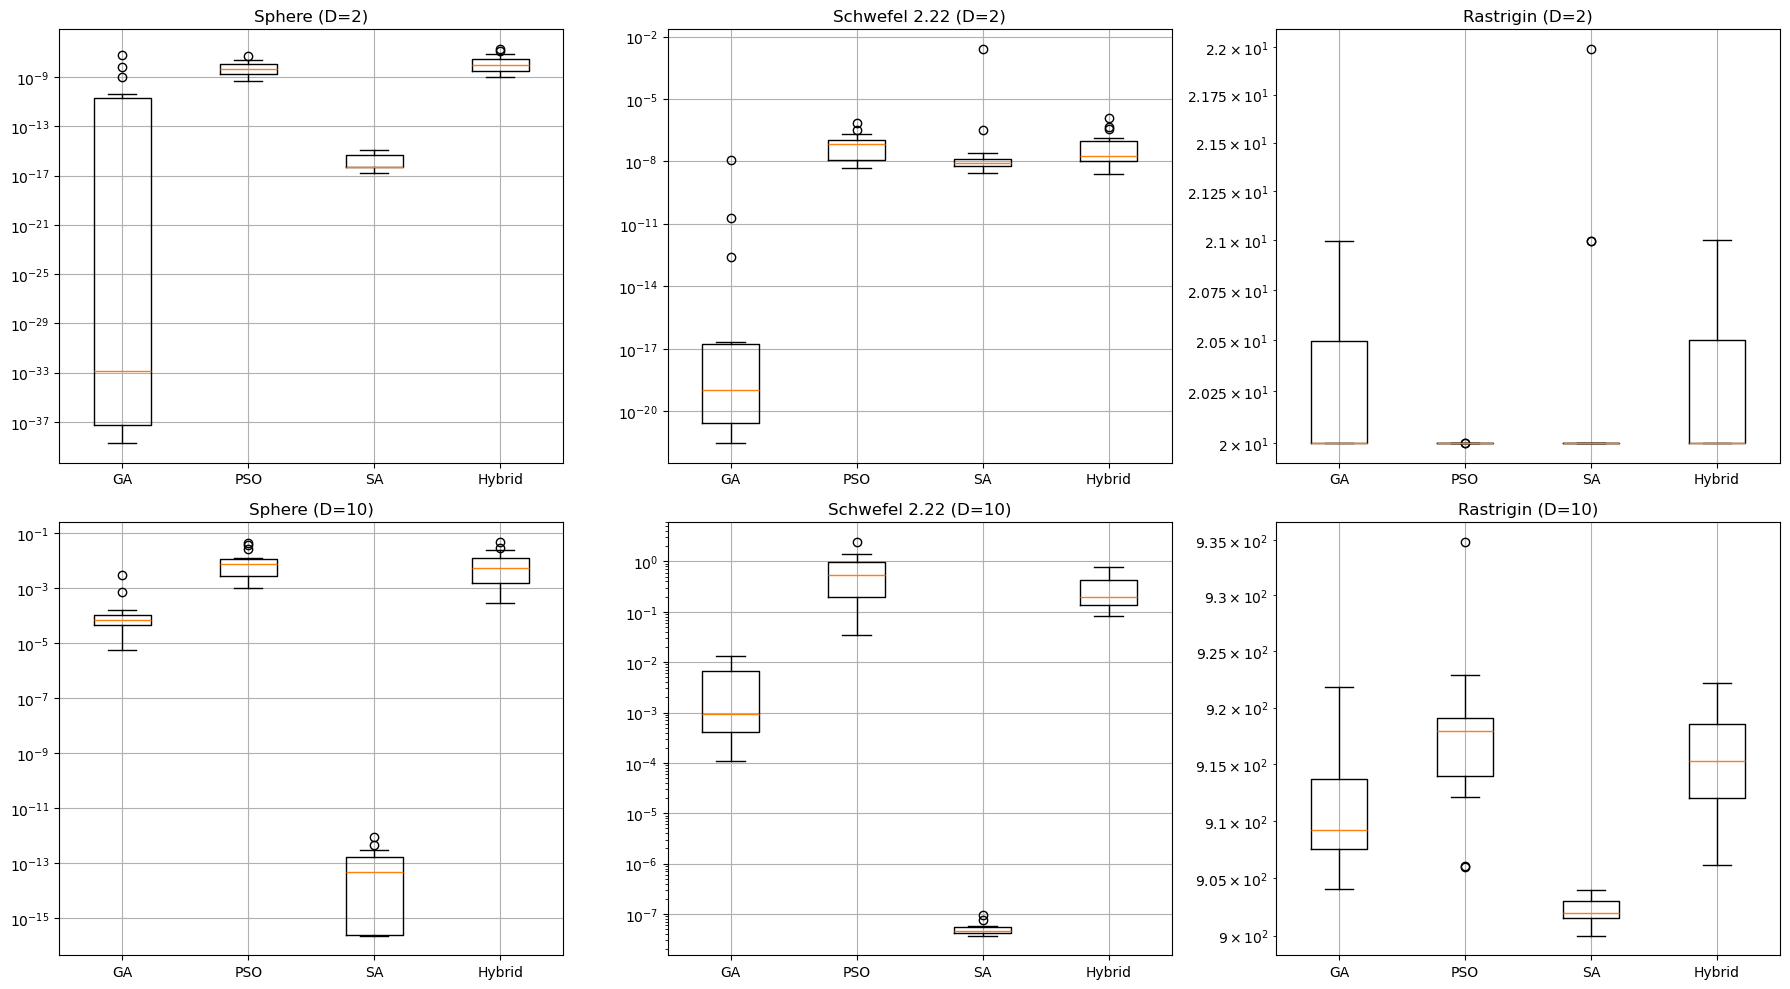

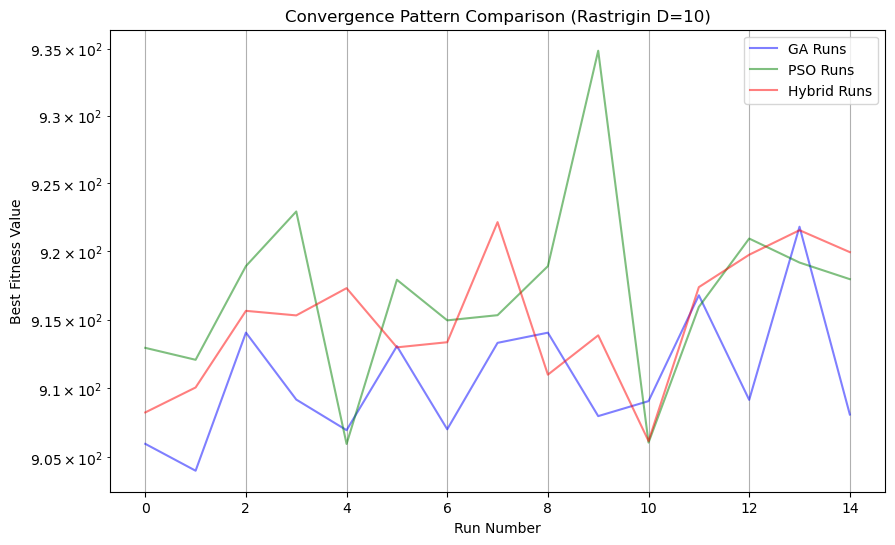

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import dual_annealing
from pyswarm import pso
from deap import base, creator, tools, algorithms

# ======================
# BENCHMARK FUNCTIONS
# ======================

def sphere(x):
    """F1: Sphere Function"""
    return np.sum(np.array(x)**2)

def schwefel(x):
    """F2: Schwefel's Problem 2.22"""
    x = np.array(x)
    return np.sum(np.abs(x)) + np.prod(np.abs(x))

def rastrigin(x):
    """F3: Rastrigin's Function"""
    x = np.array(x)
    return np.sum(x**2 - 10 * np.cos(2 * np.pi * x) + 10 * len(x))

# ======================
# OPTIMIZATION ALGORITHMS
# ======================

def genetic_algorithm(func, dim):
    """Genetic Algorithm implementation using DEAP"""
    # Create types if they don't exist
    if "FitnessMin" in creator.__dict__:
        del creator.FitnessMin
    if "Individual" in creator.__dict__:
        del creator.Individual
        
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.uniform, -5, 5)
    toolbox.register("individual", tools.initRepeat, creator.Individual, 
                    toolbox.attr_float, n=dim)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", lambda ind: (func(np.array(ind)),))
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.5, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    population = toolbox.population(n=50)
    algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2, 
                       ngen=100, verbose=False)
    
    best_ind = tools.selBest(population, 1)[0]
    return func(np.array(best_ind))

def particle_swarm_optimization(func, dim):
    """PSO implementation using pyswarm"""
    def pso_wrapper(x):
        return func(np.array(x))
    
    lb = [-5] * dim
    ub = [5] * dim
    x_opt, f_opt = pso(pso_wrapper, lb, ub, swarmsize=50, maxiter=100)
    return f_opt

def simulated_annealing(func, dim):
    """Simulated Annealing using SciPy's dual_annealing"""
    bounds = [(-5, 5)] * dim
    result = dual_annealing(func, bounds, maxiter=100)
    return result.fun

# ======================
# HYBRID GA-PSO ALGORITHM
# ======================

def hybrid_ga_pso(func, dim, ga_iters=50, pso_iters=50):
    """Hybrid GA-PSO Optimization"""
    # Clean existing DEAP classes
    if "FitnessMin" in creator.__dict__:
        del creator.FitnessMin
    if "Individual" in creator.__dict__:
        del creator.Individual
        
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    # GA Phase
    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.uniform, -5, 5)
    toolbox.register("individual", tools.initRepeat, creator.Individual,
                    toolbox.attr_float, n=dim)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", lambda ind: (func(np.array(ind)),))
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.5, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    population = toolbox.population(n=50)
    algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2,
                       ngen=ga_iters, verbose=False)

    # PSO Refinement
    best_ga = np.array(tools.selBest(population, 1)[0])
    lb = np.clip(best_ga - 1, -5, 5)
    ub = np.clip(best_ga + 1, -5, 5)
    
    x_opt, f_opt = pso(func, lb, ub, swarmsize=30, maxiter=pso_iters)
    return f_opt

# ======================
# EXPERIMENT SETUP
# ======================

DIMENSIONS = [2, 10]
NUM_RUNS = 15
FUNCTIONS = [sphere, schwefel, rastrigin]
FUNCTION_NAMES = ['Sphere', 'Schwefel 2.22', 'Rastrigin']

results = {
    'GA': np.zeros((NUM_RUNS, len(FUNCTIONS), len(DIMENSIONS))),
    'PSO': np.zeros((NUM_RUNS, len(FUNCTIONS), len(DIMENSIONS))),
    'SA': np.zeros((NUM_RUNS, len(FUNCTIONS), len(DIMENSIONS))),
    'Hybrid': np.zeros((NUM_RUNS, len(FUNCTIONS), len(DIMENSIONS)))
}

# ======================
# EXECUTION
# ======================

for dim_idx, dimension in enumerate(DIMENSIONS):
    print(f"\nProcessing Dimension {dimension}")
    
    for func_idx, (func, name) in enumerate(zip(FUNCTIONS, FUNCTION_NAMES)):
        print(f"  Optimizing {name} function...")
        
        for run in range(NUM_RUNS):
            # Run optimization algorithms
            results['GA'][run, func_idx, dim_idx] = genetic_algorithm(func, dimension)
            results['PSO'][run, func_idx, dim_idx] = particle_swarm_optimization(func, dimension)
            results['SA'][run, func_idx, dim_idx] = simulated_annealing(func, dimension)
            results['Hybrid'][run, func_idx, dim_idx] = hybrid_ga_pso(func, dimension)

# ======================
# ANALYSIS & VISUALIZATION
# ======================

def print_statistics(data, algorithm):
    """Calculate and display performance statistics"""
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)
    bests = np.min(data, axis=0)
    worsts = np.max(data, axis=0)
    
    print(f"\n{algorithm} Performance:")
    for fidx, name in enumerate(FUNCTION_NAMES):
        print(f"  {name}:")
        print(f"    Avg: {means[fidx]:.4e} ± {stds[fidx]:.4e}")
        print(f"    Best: {bests[fidx]:.4e}  Worst: {worsts[fidx]:.4e}")

# Generate statistics
for dim_idx, dim in enumerate(DIMENSIONS):
    print(f"\n=== Dimension {dim} Results ===")
    for algo in ['GA', 'PSO', 'SA', 'Hybrid']:
        print_statistics(results[algo][:, :, dim_idx], algo)

# Boxplot visualization
fig, axs = plt.subplots(len(DIMENSIONS), len(FUNCTIONS), figsize=(18, 10))

for dim_idx, dim in enumerate(DIMENSIONS):
    for fidx, name in enumerate(FUNCTION_NAMES):
        ax = axs[dim_idx, fidx]
        data = [
            results['GA'][:, fidx, dim_idx],
            results['PSO'][:, fidx, dim_idx],
            results['SA'][:, fidx, dim_idx],
            results['Hybrid'][:, fidx, dim_idx]
        ]
        ax.boxplot(data, labels=['GA', 'PSO', 'SA', 'Hybrid'])
        ax.set_title(f"{name} (D={dim})")
        ax.set_yscale('log')
        ax.grid(True)

plt.tight_layout()
plt.show()

# Convergence plot for a sample run
def plot_convergence():
    plt.figure(figsize=(10, 6))
    algorithms = ['GA', 'PSO', 'Hybrid']
    colors = ['blue', 'green', 'red']
    
    for algo, color in zip(algorithms, colors):
        plt.plot(results[algo][:, 2, 1],  # Rastrigin D=10
                color=color, 
                alpha=0.5, 
                label=f'{algo} Runs')
    
    plt.yscale('log')
    plt.title("Convergence Pattern Comparison (Rastrigin D=10)")
    plt.xlabel("Run Number")
    plt.ylabel("Best Fitness Value")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_convergence()
